# Tutorial 05: Descriptive and inferential statistics with Python

---

## What we talked about last time
- Numpy (data inspection and manipulation)
- Matplotlib (plotting)

---

## Plan for today
- Pandas (data analysis and descriptive statistics)
- Scipy (inferential statistics)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

## Pandas

In [2]:
import pandas as pd

### What is Pandas? And why use it?

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data. It stores data in a tabular form. Each table contains one or more data categories in columns, also called attributes. Each row, also called a record, contains a unique instance of the data represented by the table.

It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

The most basic Pandas object is called a "Series". Pandas Series is a generalization of one-dimensional array with flexible indexing (one index per element in the column):

In [3]:
ages = [25, 30, 33, 28]
names = ['Mohammad', 'Nick', 'Hana', 'Anna']
ss = pd.Series(ages, index=names)
ss

Mohammad    25
Nick        30
Hana        33
Anna        28
dtype: int64

There is usually more than one way to achieve the same thing in Pandas

In [4]:
names_and_ages_dict = {'Mohammad': 25, 
                       'Nick':30, 
                       'Hana':33, 
                       'Anna': 28}
ss = pd.Series(names_and_ages_dict)
ss

Mohammad    25
Nick        30
Hana        33
Anna        28
dtype: int64

### Pandas DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Pandas `DataFrame` is a generalization of two-dimensional array wit flexible indexing. We can create DataFrame directly from a dictionary, or from series:

In [5]:
age = {'Mohammad': 25, 'Nick':30, 'Hana':33, 'Anna': 28}
weight = {'Mohammad': 90, 'Nick': 80,'Hana': 50, 'Anna':55}

In [6]:
df = pd.DataFrame({'age': age, 'weight': weight})

In [7]:
df

,age,weight
Mohammad,25,90
Nick,30,80
Hana,33,50
Anna,28,55


In [8]:
df.index

Index(['Mohammad', 'Nick', 'Hana', 'Anna'], dtype='object')

In [9]:
df.columns

Index(['age', 'weight'], dtype='object')

### Loading data

#### CSV file local

In [10]:
df = pd.read_csv("titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### CSV file URL

In [11]:
csv_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(csv_url)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Data inspection

In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [14]:
df.shape

(891, 15)

In [15]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [16]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Quick question: what are the 25%, 50%, and 75%?

#### Quick question: what is another name for the 50%?

### Data selection: column-wise

We can select specific columns to show:

In [17]:
df[['survived', 'age', 'sex', 'alone']].head()

,survived,age,sex,alone
0,0,22.0,male,False
1,1,38.0,female,False
2,1,26.0,female,True
3,1,35.0,female,False
4,0,35.0,male,True


In [18]:
df[df.columns[:5]].head()

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


### Data Selection: Row-wise

Row-wise indexing can be done in two ways:
    - via the index value
    - via the numbered location of the row, row number 10 for example
    
`.iloc`: to index rows with numbered location <br>
`.loc`: to index rows with idex value

For this purpose, let's change the index value of our DataFrame. So we are gonna import it differently:

In [19]:
age = {'Mohammad': 25, 'Nick':30, 'Hana':33, 'Anna': 28}
weight = {'Mohammad': 90, 'Nick': 80,'Hana': 50, 'Anna':55}

df = pd.DataFrame({'age': age, 'weight': weight})
df

,age,weight
Mohammad,25,90
Nick,30,80
Hana,33,50
Anna,28,55


In [20]:
df.loc['Nick']

age       30
weight    80
Name: Nick, dtype: int64

In [21]:
df.iloc[2]

age       33
weight    50
Name: Hana, dtype: int64

### Masking

In [22]:
df.age > 28

Mohammad    False
Nick         True
Hana         True
Anna        False
Name: age, dtype: bool

In [23]:
df.loc[df.age > 28]

,age,weight
Nick,30,80
Hana,33,50


In [24]:
df.loc[df.age > 28]

,age,weight
Nick,30,80
Hana,33,50


#### Element-wise boolean operations

In [25]:
(df.age > 28)

Mohammad    False
Nick         True
Hana         True
Anna        False
Name: age, dtype: bool

In [26]:
(df.weight > 60)

Mohammad     True
Nick         True
Hana        False
Anna        False
Name: weight, dtype: bool

In [27]:
(df.age > 28) & (df.weight > 60)

Mohammad    False
Nick         True
Hana        False
Anna        False
dtype: bool

In [28]:
df.loc[(df.age > 28) & (df.weight > 60)]

,age,weight
Nick,30,80


### How to select rows and columns at the same time?

In [29]:
selected_cols = ['age']
df.loc[df.age > 28][selected_cols] # solution 1

,age
Nick,30
Hana,33


In [30]:
df.loc[df.age > 28, selected_cols] # solution 2

,age
Nick,30
Hana,33


### Exercise #1

### Data Manipulation

Mainly two aspect:
- Changing labels
    - change index
    - remove rows
    - add new columns
    - reordering the columns
    - renaming columns
    - removing columns
- **Changing data (applying some funcions, or adding new data, etc.)**
    - change column values
    - apply functions on the columns and rows
        - group-wise
        - element-wise

In [31]:
df = pd.read_csv("titanic.csv")

In [32]:
df['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [33]:
df['age'] + 2

0      24.0
1      40.0
2      28.0
3      37.0
4      37.0
       ... 
886    29.0
887    21.0
888     NaN
889    28.0
890    34.0
Name: age, Length: 891, dtype: float64

In [34]:
df['new_age'] = df['age'] + 2

In [35]:
df[['age', 'new_age']].head()

,age,new_age
0,22.0,24.0
1,38.0,40.0
2,26.0,28.0
3,35.0,37.0
4,35.0,37.0


In [36]:
df['survived'] = df['survived'].astype(bool)

In [37]:
df.survived

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: survived, Length: 891, dtype: bool

#### Applying functions: group-wise

#### This is also called aggregation: **taking many samples and produce one value**

You could simply use numpy functions on the pandas dataframe

In [38]:
np.mean(df['age']), np.std(df['age'])

(29.69911764705882, 14.516321150817317)

In [39]:
np.mean(df, axis=0)

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
new_age       31.699118
dtype: float64

But.. Pandas provides a more convenient way that allows applying multiple aggregate functions at the same time:

In [40]:
df.agg([np.mean, np.std, np.min, np.max])

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone,new_age
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,0.602694,NaN,0.602694,31.699118
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,0.489615,NaN,0.489615,14.526497
amin,False,1.000000,female,0.420000,0.000000,0.000000,0.000000,First,child,False,no,False,2.420000
amax,True,3.000000,male,80.000000,8.000000,6.000000,512.329200,Third,woman,True,yes,True,82.000000


And of course you can also do this for selected columns

In [41]:
selected_cols = ['age', 'fare']
df[selected_cols].agg([np.mean, np.std, np.min, np.max])

,age,fare
mean,29.699118,32.204208
std,14.526497,49.693429
amin,0.420000,0.000000
amax,80.000000,512.329200


You can also directly apply aggregate functions on the dataframe

In [42]:
df.mean()

/tmp/ipykernel_417/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
new_age       31.699118
dtype: float64

#### Applying functions: element-wise

`apply` method loops through the elements of a Pandas iterable object and applies the function to the element. In the case of a Pandas DataFrame, we can either apply the function across rows (for each column) with `axis=0` or across columns with `axis=1`. 

In [43]:
def func(ss):
    return ss.shape

In [44]:
df.apply(func)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,891,891,891,891,891,891,891,891,891,891,891,891,891,891,891,891


In [45]:
def max_to_one(ss):
    return ss / ss.max()

In [46]:
selected_cols = ['age', 'fare']
dd = df[selected_cols].apply(max_to_one)

In [47]:
dd.max()

age     1.0
fare    1.0
dtype: float64

You can also add arguments to the function

In [48]:
def max_to_m(ss, m=1):
    return ss / ss.max() * m

In [49]:
selected_cols = ['age', 'fare']
dd = df[selected_cols].apply(max_to_m, m=3)

dd.max()

age     3.0
fare    3.0
dtype: float64

**use case**: `apply` method is usually used when you want to manipulate the data as a function of the data itself. Here is a simple example

In [50]:
def subtract_mean(ss):
    return ss - ss.mean()

In [51]:
selected_cols = ['age', 'fare']
dd = df[selected_cols].apply(subtract_mean)

In [52]:
dd.mean()

age     9.036034e-15
fare    3.835416e-14
dtype: float64

### Merging and Splitting

#### Same size, common column(s)

In [53]:
left = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                     'B': [10, 20, 30, 40, 50], 
                     'C': [100, 200, 300, 400, 500]})

right = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                      'B': [10, 20, 30, 40, 50], 
                      'D': [1000, 2000, 3000, 4000, 5000]})

In [54]:
left

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


In [55]:
right

,A,B,D
0,1,10,1000
1,2,20,2000
2,3,30,3000
3,4,40,4000
4,5,50,5000


In [56]:
pd.merge(left, right)

,A,B,C,D
0,1,10,100,1000
1,2,20,200,2000
2,3,30,300,3000
3,4,40,400,4000
4,5,50,500,5000


#### Different size, common column(s)

In [57]:
left = pd.DataFrame({'session': [1, 2, 3],
                     'mean_RT': [.3, .27, .25], 
                     'mean_perc_correct': [.6, .8, 1]})

right = pd.DataFrame({'session': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
                      'trial': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
                      'RT': [.29, .28, .3, .32, .31, .28, .27, .29, .26, .25, .25, .24, .27, .26, .24], 
                      'correct': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]})

In [58]:
left

,session,mean_RT,mean_perc_correct
0,1,0.30,0.6
1,2,0.27,0.8
2,3,0.25,1.0


In [59]:
right

,session,trial,RT,correct
0,1,1,0.29,0
1,1,2,0.28,0
2,1,3,0.30,1
3,1,4,0.32,1
4,1,5,0.31,1
5,2,1,0.28,0
6,2,2,0.27,1
7,2,3,0.29,1
8,2,4,0.26,1
9,2,5,0.25,1


In [60]:
pd.merge(left, right)

,session,mean_RT,mean_perc_correct,trial,RT,correct
0,1,0.30,0.6,1,0.29,0
1,1,0.30,0.6,2,0.28,0
2,1,0.30,0.6,3,0.30,1
3,1,0.30,0.6,4,0.32,1
4,1,0.30,0.6,5,0.31,1
5,2,0.27,0.8,1,0.28,0
6,2,0.27,0.8,2,0.27,1
7,2,0.27,0.8,3,0.29,1
8,2,0.27,0.8,4,0.26,1
9,2,0.27,0.8,5,0.25,1


In [61]:
left = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                     'B': [10, 20, 30, 40, 50], 
                     'C': [100, 200, 300, 400, 500]})

right = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                      'B': [-10, 20, -30, 40, -50], 
                      'D': [1000, 2000, 3000, 4000, 5000]})

#### Same size, same column names, but different values

In [62]:
left

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


In [63]:
right

,A,B,D
0,1,-10,1000
1,2,20,2000
2,3,-30,3000
3,4,40,4000
4,5,-50,5000


In [64]:
pd.merge(left, right)

,A,B,C,D
0,2,20,200,2000
1,4,40,400,4000


What is happening here: Pandas looks for mutual labels (both index and rows). and by default takes the intersection of common labels

How can we take the union?

In [65]:
pd.merge(left, right, how='outer')

,A,B,C,D
0,1,10,100.0,NaN
1,2,20,200.0,2000.0
2,3,30,300.0,NaN
3,4,40,400.0,4000.0
4,5,50,500.0,NaN
5,1,-10,NaN,1000.0
6,3,-30,NaN,3000.0
7,5,-50,NaN,5000.0


So it took all the rows of the `left` DataFrame first (setting the value of column D to NaN when there is no intersection), and then added the rows of the `right` DataFrame that were different from A.

How can we tell Pandas to only look into one column and take the intersection (or union)?

In [66]:
pd.merge(left, right, on='A')

,A,B_x,C,B_y,D
0,1,10,100,-10,1000
1,2,20,200,20,2000
2,3,30,300,-30,3000
3,4,40,400,40,4000
4,5,50,500,-50,5000


Note that for the column with the same name, it created two separate columns.

In [67]:
pd.merge(left, right, on='B')

,A_x,B,C,A_y,D
0,2,20,200,2,2000
1,4,40,400,4,4000


In [68]:
pd.merge(left, right, on='B', how='outer')

,A_x,B,C,A_y,D
0,1.0,10,100.0,NaN,NaN
1,2.0,20,200.0,2.0,2000.0
2,3.0,30,300.0,NaN,NaN
3,4.0,40,400.0,4.0,4000.0
4,5.0,50,500.0,NaN,NaN
5,NaN,-10,NaN,1.0,1000.0
6,NaN,-30,NaN,3.0,3000.0
7,NaN,-50,NaN,5.0,5000.0


* first took the rows of the `left` DataFrame and then the `right` DataFrame
* it created a separate column for the ones with the same name (except the one that we are mergin on) -> `A_x` and `A_y`
* at the points where the rows are not the same for the similarly-named columns the values are set to NaN accordingly

In [69]:
left

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


In [70]:
right

,A,B,D
0,1,-10,1000
1,2,20,2000
2,3,-30,3000
3,4,40,4000
4,5,-50,5000


## Splitting Pandas DataFrames

Let's start by splitting. Usually, we want to split our DataFrame into multiple DataFrames based on the values of a specific column. In other words we want to group the data in our dataset, based on some value. The function we use to do this is called `groupby()`.

In [71]:
grp = df.groupby('sex')

In [72]:
grp.groups.keys()

dict_keys(['female', 'male'])

In [73]:
grp.get_group('female').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
1,True,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,40.0
2,True,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,28.0
3,True,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,37.0
8,True,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,29.0
9,True,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,16.0


### Split-Apply-Combine

The idea behind this term is simply the fact that, we usually want to 
- *split* the DataFrame
- *apply* some function on it, and 
- then *combine* the results back into one DataFrame.<br>

Example:
- split the Titanic DataFrame based on gender
- compute the mean age for each geneder
- get the results in a single DataFrame

In [74]:
df.groupby('sex').apply(np.mean)

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,new_age
sex,,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645


If we want to compute a single value (i.e., aggregation), the we use `agg()`:

In [75]:
df.groupby('sex').agg(np.mean)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,new_age
sex,,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645


We can also do this for specific columns

In [76]:
selected_cols = ['age', 'fare']
df.groupby('sex')[selected_cols].apply(np.mean)

,age,fare
sex,,
female,27.915709,44.479818
male,30.726645,25.523893


In this particular case we get the same DataFrame as the output. But, as we mentioned earlier, `apply` is usually used to manipulate the data as a function of the data itself, with flexible function defintion:

In [77]:
def subtract_mean(dd):
    return dd - dd.mean()

In [78]:
df_new = df.groupby('sex')[selected_cols].apply(subtract_mean)
df_new

,age,fare
0,-8.726645,-18.273893
1,10.084291,26.803482
2,-1.915709,-36.554818
3,7.084291,8.620182
4,4.273355,-17.473893
...,...,...
886,-3.726645,-12.523893
887,-8.915709,-14.479818
888,NaN,-21.029818
889,-4.726645,4.476107


But sometimes you want the result of the aggregate functions to be broadcasted back into the original DataFrame size. We can do thi via the `transform` method

Recall that `apply` resulted in:

In [79]:
df.groupby('sex').apply(np.mean)

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,new_age
sex,,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645


In [80]:
df_new = df.groupby('sex').transform(np.mean)
df_new

/tmp/ipykernel_417/1398820953.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df_new = df.groupby('sex').transform(np.mean)


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,new_age
0,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645
1,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
2,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
3,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
4,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645
...,...,...,...,...,...,...,...,...,...
886,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645
887,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
888,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
889,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645


In [81]:
df_new['sex'] = df['sex']

In [82]:
df_new

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,new_age,sex
0,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645,male
1,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709,female
2,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709,female
3,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709,female
4,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645,male
...,...,...,...,...,...,...,...,...,...,...
886,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645,male
887,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709,female
888,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709,female
889,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645,male


### Exercise #2

---

## Scipy.stats for inferential statistics

In [83]:
from scipy import stats

You can define distributions and generate samples. Let's try this for a normal distribution:

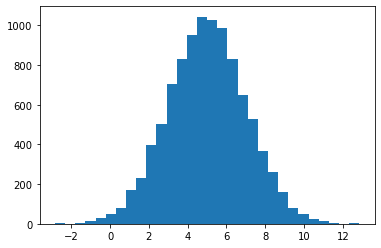

In [84]:
np.random.seed(42)

mean = 5
std = 2
dist = stats.norm(mean, std)

dd = dist.rvs(10000)
plt.hist(dd, bins=30);

### Exercise #3

### Confidence interval via Student's t-distribution

distributions defined using `scipy.stats` have methods for computing the pdf and cdf. Using these methods we can compute upper and lower bounds of the confidence interval.

In [85]:
n = 100
df = n - 1

dist = stats.t(df, 0, 1)

In [86]:
x = np.linspace(-5, 5, 1000)

In [87]:
x_pdf = dist.pdf(x)

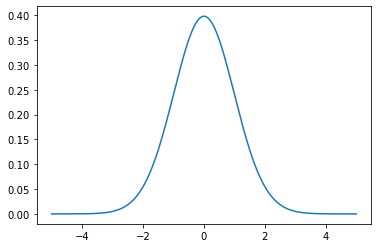

In [88]:
plt.plot(x, x_pdf)

In [89]:
x_cdf = dist.cdf(x)

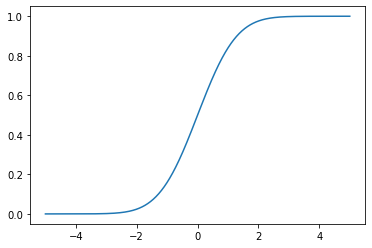

In [90]:
plt.plot(x, x_cdf)

### Exercise #4

---

### Find out more
- [Pandas essential basic functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html) (highly encouraged to take a look)

---

## Next week

- More on inferential statistics
- Regression